<a href="https://colab.research.google.com/github/b6nick/Data-Science-Final-Project/blob/main/Tufano_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nick Tufano
# Data Science 201 - Final Project 

##**Business Understanding**

This project uses machine learning algorithms to see if it can sucessfully predict when to buy a specific stock. As and economics major going into finance, the success of this project would be extremley valuable both in a business setting and for individual investors. There are thousands of firms across the globe paying top dollar for quants, data scienctists, and computer scientists to explore this same topic. 

An important note as part of the business understanding. In order for this to be deployable as an actual investment strategy it needs to not only be successful, but with a strong degree of confidence as significant sums of real dollars will be at stake. Given the amount of dollars and research already done on the topic, I am pessimistic of my success in this project becoming a deployable investment strategy. Nonetheless, this will serve as a great example of the Data Science Process and the capabilities of machine learning

##**Data Understanding**

**Importing Libraries**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

**Importing Data**

In [20]:
df = pd.read_csv('PGStockPrice.csv')

**Exploring the Data**

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/16/02,43.709999,44.025002,43.165001,44.025002,25.587589,6884200
1,12/17/02,44.000000,44.005001,43.525002,43.700001,25.398678,6956200
2,12/18/02,43.599998,43.924999,43.404999,43.685001,25.389971,6152400
3,12/19/02,43.685001,43.695000,42.680000,42.849998,24.904657,9275800
4,12/20/02,43.345001,43.889999,43.169998,43.840000,25.480066,11114800


In [22]:
df.shape

(5035, 7)

In [23]:
df.describe

<bound method NDFrame.describe of           Date        Open        High         Low       Close   Adj Close  \
0     12/16/02   43.709999   44.025002   43.165001   44.025002   25.587589   
1     12/17/02   44.000000   44.005001   43.525002   43.700001   25.398678   
2     12/18/02   43.599998   43.924999   43.404999   43.685001   25.389971   
3     12/19/02   43.685001   43.695000   42.680000   42.849998   24.904657   
4     12/20/02   43.345001   43.889999   43.169998   43.840000   25.480066   
...        ...         ...         ...         ...         ...         ...   
5030   12/8/22  149.460007  151.380005  149.009995  151.320007  151.320007   
5031   12/9/22  150.699997  151.949997  150.220001  150.919998  150.919998   
5032  12/12/22  151.220001  152.559998  151.039993  152.470001  152.470001   
5033  12/13/22  153.410004  154.229996  150.789993  152.240005  152.240005   
5034  12/14/22  152.789993  154.440002  152.169998  152.839996  152.839996   

        Volume  
0      68842

In [24]:
df.info

<bound method DataFrame.info of           Date        Open        High         Low       Close   Adj Close  \
0     12/16/02   43.709999   44.025002   43.165001   44.025002   25.587589   
1     12/17/02   44.000000   44.005001   43.525002   43.700001   25.398678   
2     12/18/02   43.599998   43.924999   43.404999   43.685001   25.389971   
3     12/19/02   43.685001   43.695000   42.680000   42.849998   24.904657   
4     12/20/02   43.345001   43.889999   43.169998   43.840000   25.480066   
...        ...         ...         ...         ...         ...         ...   
5030   12/8/22  149.460007  151.380005  149.009995  151.320007  151.320007   
5031   12/9/22  150.699997  151.949997  150.220001  150.919998  150.919998   
5032  12/12/22  151.220001  152.559998  151.039993  152.470001  152.470001   
5033  12/13/22  153.410004  154.229996  150.789993  152.240005  152.240005   
5034  12/14/22  152.789993  154.440002  152.169998  152.839996  152.839996   

        Volume  
0      6884200

**Plotting Rise of P&G Stock Price**

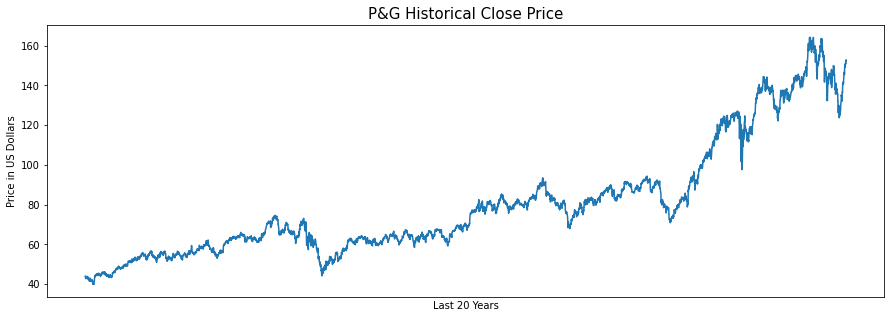

In [32]:
plt.figure(figsize=(15,5))
plt.xticks([])
plt.plot(df['Close'])
plt.title('P&G Historical Close Price', fontsize=15)
plt.ylabel('Price in US Dollars')
plt.xlabel('Last 20 Years')
plt.show()

**Checking Distribution of Variables**

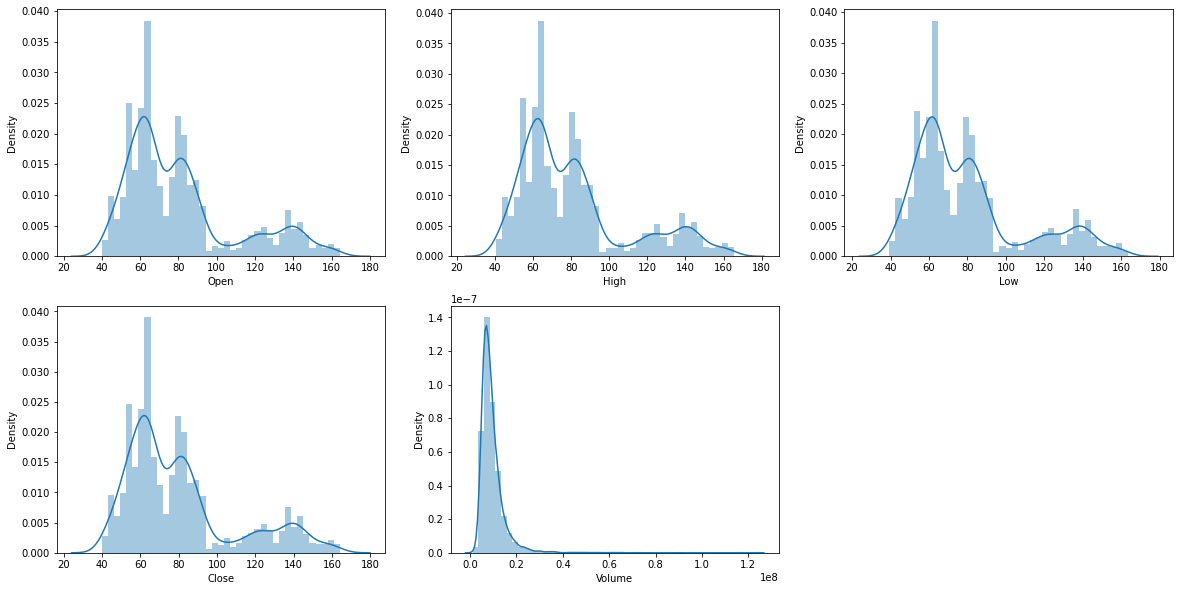

In [33]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

##**Data Preperation**

**Dropping Unused Variables**

In [34]:
df[df['Close'] == df['Adj Close']].shape

(39, 7)

In [35]:
df = df.drop(['Adj Close'], axis=1)

**Checking for Null Values in Variables**

In [36]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Checking for Outliers**

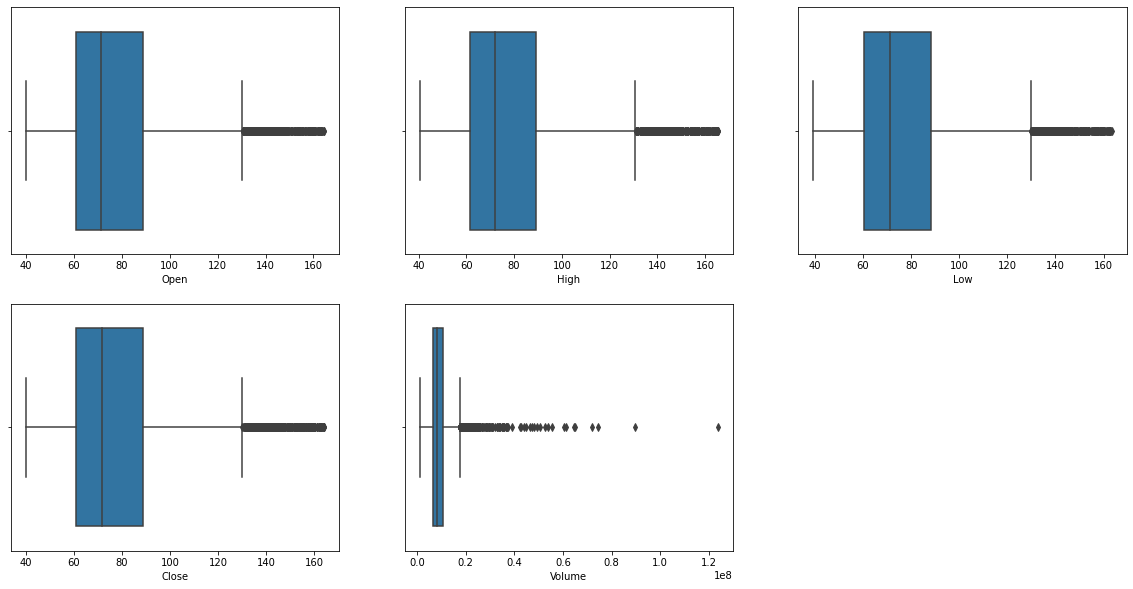

In [37]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

No outliers other than volume which is okay. Variance in share prices makes sense given the trend of the stock price in the last two years.

##**Modeling+Evaluating**



Setting target value for machine learning to strive for.

In [38]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

Checking if target is balanced

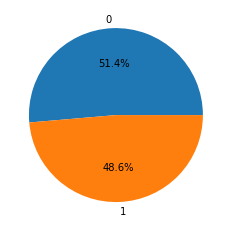

In [39]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

Using a heatmap to see if any variables are highly correlated. Setting the threshold fpr high correlation as anything over 0.9.

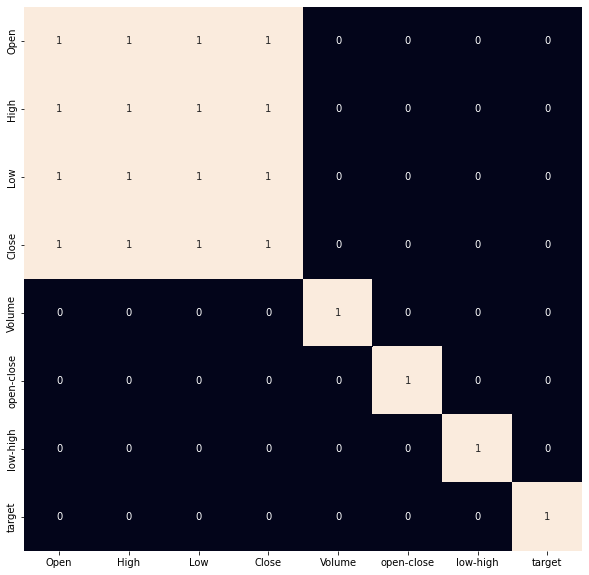

In [40]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above we can see that none of the variables are highly correlated other than Open, High, Low and Close which makes sense.

In [41]:
features = df[['open-close', 'low-high']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(4531, 2) (504, 2)


##**Deployment**

Using three types of machine learning to see which is able to best predict whether or not to buy P&G stock. The code below is for a logistic regression, a support vector classifier and a XGBClassifier.

In [42]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5210454431127567
Validation Accuracy :  0.5233921815889029

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4948908425508352
Validation Accuracy :  0.4716582597730139

XGBClassifier() : 
Training Accuracy :  0.6630244129752789
Validation Accuracy :  0.4850015762925599



From the above results we see that the SVC performed the worse. The best on the training set was the XGB Classifier, but looking at how it performed in validation test shows that the model is likely overfitting. The logistic regression performed the best, but still barely better than a 50/50 guess.

Visually plotting our results to better interpret them.

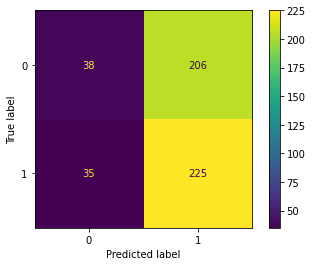

In [43]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

The above graph shows that the models did not perform much better than flipping a coin.


This result is what was expected. We were aware of the small liklihood of being able to sucessfully predict whether or not to buy a stock from the start. While the machine learning was unsucessful in this pursuit, we did successfully have the machine learning categorize the data off of a training set and predict the validation set. Having an unsuccessful model IS OKAY IN DATA SCIENCE. The import thing is that we take the time to understand why it fails and and are clear and transparent about those failures.

##**Sources**

https://neptune.ai/blog/predicting-stock-prices-using-machine-learning

https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning

https://www.geeksforgeeks.org/stock-price-prediction-using-machine-learning-in-python/

https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233

https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/